## Relax Data Science Challenge

The data comes from the relax data science challenge. The provided files are takehome_users.csv and takehome_user_engagement.csv, which contains user information and record of days users log into the product. The project is to identify 'adopted users' by the definition of a user who has logged into the product on three separate days in at least one seven-day period and find which factors predict future user adoption.

---
### Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin1')
df_users.head(15)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
df['time_stamp'] = pd.to_datetime(df.time_stamp, format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


The dataframe of users shows last session creation time of users in unix timestamp. There are some null values in both columns of last session creation time and invited by user id. Next, we will create a column to label adopted users by the provided definition of user who has logged into the product on three separate days in at least one seven-day period.

In [7]:
df_users['creation_time'] = pd.to_datetime(df_users.creation_time, format = '%Y-%m-%d')
df_users['last_session_creation_time'] = pd.to_datetime(df_users.last_session_creation_time, unit='s')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [8]:
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0


In [10]:
# Create a function to find adopted users using engagement data 
def seek_adopted(df):
    df_temp = df
    df_temp['time_stamp'] = df_temp['time_stamp'].dt.floor('d').astype(np.int64)
    #sorting and remove duplicated days per users 
    df_temp = df_temp.sort_values(['user_id', 'time_stamp']).drop_duplicates()

    a = df_temp.groupby('user_id')['time_stamp'].rolling(window=3)
    b = pd.to_timedelta((a.max()- a.min())).dt.days

    c = b[b <= 7].index.get_level_values('user_id').tolist()
    return c

In [12]:
# Create list of unique adopted users and find the number of users

adopted_list = seek_adopted(df)

output = []
for x in adopted_list:
    if x not in output:
        output.append(x)
print(len(output))

1656


In [13]:
print(output[:10])

[2, 10, 20, 33, 42, 43, 50, 53, 60, 63]


In [14]:
# Remove users who has not yet logged into product

df_users_logged = df_users[df_users.last_session_creation_time.notnull()]
print(len(df_users_logged))

8823


In [15]:
# Find the amount of users who have not yet logged into the product

df_users_nat = df_users[df_users.last_session_creation_time.isnull()]
print(len(df_users_nat))

3177


In [16]:
# Check of adopted users are all included in the cleaned list of users

print(len(output) == len(list(set(output) & set(df_users.object_id))))

True


In [17]:
list_null = pd.DataFrame({'label':['Users Logged In', 'Users Not Logged In'],'count':[8823, 3177]})
list_null

,label,count
0,Users Logged In,8823
1,Users Not Logged In,3177


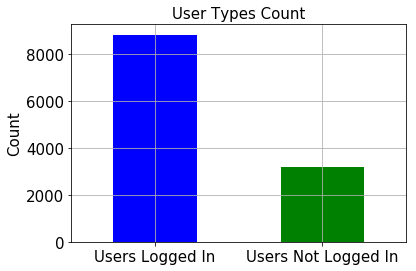

In [18]:
fs=15
ax = list_null.plot.bar(x='label', y='count', color=['b','g'], rot=0, legend=None)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel(None)
plt.ylabel('Count', fontsize=fs)
plt.title('User Types Count', fontsize=fs)
plt.grid()

There are 1656 adopted users out of total 12,000 users who signed up for the product, that is less than 15% of total users. And yet, are about a third of total signed-up users who have not logged in to the product ever. Since the data is somewhat imbalanced, with classes in roughly 15% and 85% distribution, we will keep an eye on the effect of modeling.

---

### Feature engineering

The steps to prepare the data for machine learning model:
1. Create target variable by the list of **adopted users**
2. Create new features:
    - **Usage time**, which is the length of time an user has been using the product by logging in. This feature is generated by the difference of user profile creation time and last session creation time
    - **Email provider**, this feature is generated by labeling users with the top 5 most common email providers from user email and labeling the rest as 'others'
3. Remove unnecessary columns:
    - **object ID**
    - **user name**
    - **user email**
4. convert categorical features such as **email providers** and **user creation sources** into indicator variables using **get_dummies**


In [19]:
# Create column 'Adopted' to label adopted users
df_users['Adopted'] = 0
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [20]:
# Label adopted users using the list 'output'

df_users.loc[df_users['object_id'].isin(output),'Adopted'] = 1
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1


After the target column has been created, we will move on to feature engineering. 

In [21]:
# Create a copy of df_users for feature engineering and modeling

users = df_users
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [22]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)

In [23]:
users['usage_time'] = users['last_session_creation_time'] - users['creation_time']
users['usage_time'] = users['usage_time'].fillna(0)
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,usage_time
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0 days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136 days
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0 days
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1 days
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5 days
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0,2 days
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,0.0,0,4 days
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,0.0,0,0 days
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,0.0,0,0 days
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1,503 days


In [24]:
users['email_provider'] = [x.split('@')[1] for x in users.email]
top_emails = users['email_provider'].value_counts().index[:5]
users['email_provider'] = [x if x in top_emails else 'other' for x in users.email_provider]
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,usage_time,email_provider
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0 days,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136 days,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0 days,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1 days,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5 days,yahoo.com


In [25]:
# drop unnecessary columns and encode both creation source and email provider
users = users.drop(['object_id', 'name', 'creation_time', 'last_session_creation_time', 'email'], axis=1)

users = pd.get_dummies(users, columns=['creation_source','email_provider'])

users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,usage_time,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_provider_cuvox.de,email_provider_gmail.com,email_provider_gustr.com,email_provider_jourrapide.com,email_provider_other,email_provider_yahoo.com
0,1,0,11,10803.0,0,0 days,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,316.0,1,136 days,0,1,0,0,0,0,0,1,0,0,0
2,0,0,94,1525.0,0,0 days,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,5151.0,0,1 days,1,0,0,0,0,0,0,0,0,0,1
4,0,0,193,5240.0,0,5 days,1,0,0,0,0,0,0,0,0,0,1


In [26]:
users['usage_time'] = users['usage_time'].astype('timedelta64[D]')

users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,usage_time,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_provider_cuvox.de,email_provider_gmail.com,email_provider_gustr.com,email_provider_jourrapide.com,email_provider_other,email_provider_yahoo.com
0,1,0,11,10803.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,316.0,1,136.0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,94,1525.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,5151.0,0,1.0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,193,5240.0,0,5.0,1,0,0,0,0,0,0,0,0,0,1


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
invited_by_user_id                    12000 non-null float64
Adopted                               12000 non-null int64
usage_time                            12000 non-null float64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
email_provider_cuvox.de               12000 non-null uint8
email_provider_gmail.com              12000 non-null uint8
email_provider_gustr.com              12000 non-null uint8
email_provider_jourrapide.com         12000 non-null uint8
em

In [28]:
df_data = users.drop('Adopted', axis=1)
df_target = users['Adopted']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.33, random_state=42)

In [30]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as pl

#Set up random forest classifier with no scaling
steps = [("model", RandomForestClassifier(random_state=40))]
pipe = pl(steps)

param_grid = {
    'model__max_depth': [10,50,100],
    'model__criterion': ['gini','entropy'],
    'model__max_features': ['auto','sqrt'],
    'model__min_samples_split': [2,4,8],
    'model__n_estimators': [10,25,50,100]   
}
cv = GridSearchCV(pipe, param_grid, cv=5)
cv.fit(X_train, y_train)

CPU times: user 2min 11s, sys: 1.81 s, total: 2min 13s
Wall time: 2min 15s


In [31]:
cv.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 10,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 25}

In [32]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve
def confusion_matrix(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)
    y_pred_test_prob = model.predict_proba(X_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    print("Best score is {}".format(model.best_score_))
    print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, y_pred_test))
    

    # Displaying the confusion matrix
    fig, ax = plt.subplots(figsize=(6,6))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24)

    #plt.title('Confusion Matrix for %s' % clf_name, size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    ax.grid(False)
    plt.tight_layout()

Best score is 0.9727611940298507
LogLoss:  0.07295562405227327
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3407
           1       0.93      0.88      0.91       553

   micro avg       0.98      0.98      0.98      3960
   macro avg       0.96      0.94      0.95      3960
weighted avg       0.97      0.98      0.97      3960



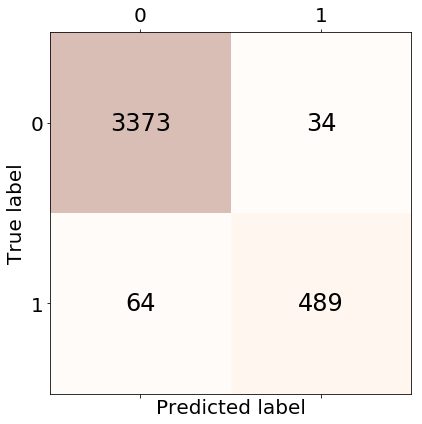

In [33]:
confusion_matrix(cv, X_test, y_test)

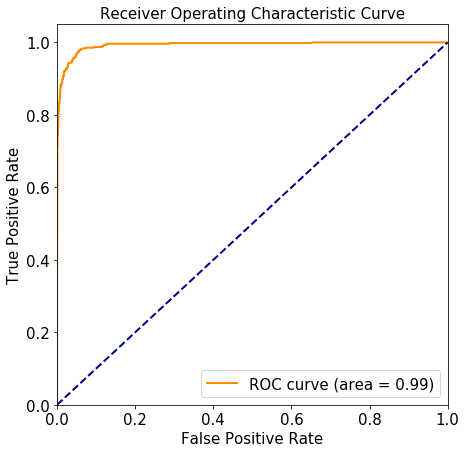

In [34]:
y_score = cv.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(size=fs)
plt.yticks(size=fs)
plt.xlabel('False Positive Rate', size=fs)
plt.ylabel('True Positive Rate', size=fs)
plt.title('Receiver Operating Characteristic Curve', size=fs)
plt.legend(loc="lower right", fontsize=fs)
plt.show()

The model is very accurate, with average precision and recall rate above 95%.

---
### Feature importance

In [35]:
RF_FI = RandomForestClassifier(criterion='gini', max_features='auto', min_samples_split=4, 
                               n_estimators=50, max_depth=10)
RF_FI.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
feature_importances = pd.DataFrame(RF_FI.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
usage_time,0.914906
org_id,0.035740
invited_by_user_id,0.021177
creation_source_PERSONAL_PROJECTS,0.003727
opted_in_to_mailing_list,0.003215
email_provider_other,0.002658
enabled_for_marketing_drip,0.002586
email_provider_yahoo.com,0.002441
email_provider_gmail.com,0.002194
creation_source_GUEST_INVITE,0.002192


In [41]:
adopted_users = df_users.loc[df_users['Adopted'] == 1]
adopted_users['usage_time'].describe()

count                        1656
mean     292 days 12:11:18.260869
std      206 days 20:17:18.095688
min               4 days 00:00:00
25%             111 days 00:00:00
50%             243 days 12:00:00
75%             463 days 00:00:00
max             729 days 00:00:00
Name: usage_time, dtype: object

Text(0.5, 1.0, 'Histogram of Adopted User Usage Length')

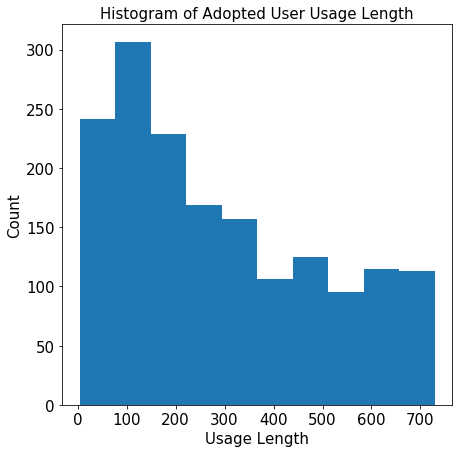

In [38]:
plt.figure(figsize=(7, 7))
plt.hist(adopted_users['usage_time'].astype('timedelta64[D]'))
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel('Usage Length', fontsize=fs)
plt.ylabel('Count', fontsize=fs)
plt.title('Histogram of Adopted User Usage Length', fontsize=fs)

In [40]:
non_adopted = df_users.loc[df_users['Adopted'] == 0]
non_adopted['usage_time'].describe()

count                      10344
mean      3 days 16:27:17.122969
std      12 days 17:35:05.739534
min              0 days 00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%              1 days 00:00:00
max            189 days 00:00:00
Name: usage_time, dtype: object

The highly accurate model relies heavily on a single variable of user usage time with feature importance above 90%. The histogram above shows that large majority of adopted users have been logging into the product for more than 100 days. Compared to majority non-adopted users who have usage time of one day or less usage time. In conclusion, users with usage time of 3 days or more will likely be an adopted user.